In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [48]:
df = pd.read_csv("income.csv")
df

,pulls,play_time,type
0,200,90,damage
1,120,120,support
2,270,120,damage
3,80,90,damage
4,140,100,support
5,150,120,damage
6,0,0,damage
7,0,0,support
8,80,150,sustain
9,60,120,sustain


### Convert categorical variables into binary indicator variables using OneHotEncoder

In [49]:
encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df[["type"]])
feature_names = encoder.get_feature_names_out(["type"])

df_encoded = pd.DataFrame(encoded, columns=feature_names)
df = pd.concat([df, df_encoded], axis=1)
df.drop(columns=["type"], inplace=True)

### Split df into features and target

In [50]:
features = df.drop(columns=["play_time"])
target = df["play_time"]
df

,pulls,play_time,type_damage,type_support,type_sustain
0,200,90,1.0,0.0,0.0
1,120,120,0.0,1.0,0.0
2,270,120,1.0,0.0,0.0
3,80,90,1.0,0.0,0.0
4,140,100,0.0,1.0,0.0
5,150,120,1.0,0.0,0.0
6,0,0,1.0,0.0,0.0
7,0,0,0.0,1.0,0.0
8,80,150,0.0,0.0,1.0
9,60,120,0.0,0.0,1.0


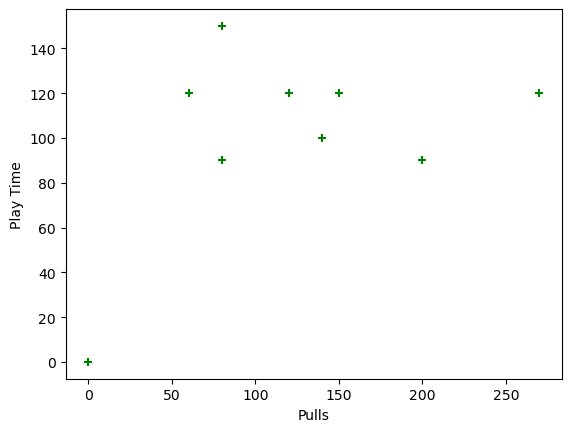

In [51]:
%matplotlib inline
plt.xlabel("Pulls")
plt.ylabel("Play Time")
plt.scatter(df['pulls'], df['play_time'], color='green', marker='+')

In [52]:
lr = LinearRegression()
lr.fit(features, target)

LinearRegression()

In [53]:
# tmp data
tmp = pd.DataFrame({
    "pulls": [0, 50, 80, 120],
    "type_damage": [0, 0, 0, 1],
    "type_support": [1, 0, 0, 0],
    "type_sustain": [1, 0 , 1, 0],
})

In [54]:
lr.predict(tmp)

array([ 83.35416667,  74.14583333, 139.765625  ,  74.46875   ])

In [55]:
lr.intercept_

50.31770833333336

In [56]:
lr.coef_

array([  0.4765625 , -33.03645833, -18.28645833,  51.32291667])

In [57]:
import joblib

joblib.dump(lr, "hsr_lr_model.pkl", compress=('zlib', 4))

['hsr_lr_model.pkl']

In [58]:
model_loaded = joblib.load("hsr_lr_model.pkl")
loaded_response = model_loaded.predict(tmp)
lr_response = lr.predict(tmp)
# Check if the loaded model's predictions match the original model's predictions
assert np.array_equal(loaded_response, lr_response)

In [59]:
model_loaded.score(features, target)

0.7514035227756493

In [60]:
no_trap_df = df.copy()
no_trap_df.drop(columns=['type_sustain'], inplace=True)
no_trap_df

,pulls,play_time,type_damage,type_support
0,200,90,1.0,0.0
1,120,120,0.0,1.0
2,270,120,1.0,0.0
3,80,90,1.0,0.0
4,140,100,0.0,1.0
5,150,120,1.0,0.0
6,0,0,1.0,0.0
7,0,0,0.0,1.0
8,80,150,0.0,0.0
9,60,120,0.0,0.0


In [61]:
model_loaded.fit(no_trap_df.drop(columns=["play_time"]), no_trap_df["play_time"])
model_loaded.score(no_trap_df.drop(columns=["play_time"]), no_trap_df["play_time"])

0.7514035227756493